In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import *



In [2]:
# MASS_H2 = Formula('H2').mass

mg=2*1.0079*0.001/(6.022e23) #[kg]
MASS_H2 = mg

mu=mg/4
b_l=0.741e-10 #[m]
I=mu*(b_l**2)
conv_v = 1.0e2
conv_omega=1.0e12 #convert [1/ps] to [1/s]
conv_J_2_eV=6.24e18


# Uncomment below line for Argon
# MASS_H2 = Formula('Ar').mass

### PCA

#### H2_IsoThermalWalls_Sw_0

##### Translational velocity

In [5]:
# Create data frame and store translational velocity components
filename_trans = 'D:/OneDrive - TU Eindhoven/Quartile_4/4AI000_Machine learning for Multi-physics modelling and design/Materials_for_ML_assignment_2024/H2_IsoThermalWalls_Sw_0/H2_Vel_MD_Sw_0_B300_Th_300.txt'
names_vel = ['v_x_in', 'v_y_in', 'v_z_in', 'v_x_out', 'v_y_out', 'v_z_out',]
df_trans_vel = pd.read_csv(filename_trans, sep= '\s+', header=None, skiprows=[0], names = names_vel).sample(frac = 1)

# Convert to m/s
df_trans_vel = df_trans_vel*conv_v

# Create data frame and store rotational velocity components
filename_rot = r'D:\OneDrive - TU Eindhoven\Quartile_4\4AI000_Machine learning for Multi-physics modelling and design\Materials_for_ML_assignment_2024\H2_IsoThermalWalls_Sw_0\H2_omega_Sw_0_B300_Th_300.txt'
names_rot_vel = ['omega_1_in', 'omega_2_in', 'omega_1_out', 'omega_2_out']
df_rot_vel = pd.read_csv(filename_rot, sep= '\s+', header=None, skiprows=[0], names = names_rot_vel).sample(frac = 1)

# Convert to 1/s
df_rot_vel = df_rot_vel*conv_omega

# Concatenate all velocity components
df_vel = pd.concat([df_trans_vel, df_rot_vel], axis=1)

# Uncomment below line for Argon
# df_vel = df_rot_vel   

#Remove NaN values from dataframe
df_vel.replace([np.inf, -np.inf], np.nan, inplace=True)
df_vel.dropna(axis= 0, how='any')

,v_x_in,v_y_in,v_z_in,v_x_out,v_y_out,v_z_out,omega_1_in,omega_2_in,omega_1_out,omega_2_out
105370,-1147.1250,-2762.83500,-1076.20550,-1583.14500,376.1700,1492.3595,3.356823e+13,-1.902955e+13,2.831671e+13,6.694405e+13
120763,1227.0035,-1184.99000,145.19300,662.62750,2496.4300,-1047.6920,-1.149553e+12,1.389748e+13,-2.816262e+13,1.778707e+13
93652,-1781.1850,-1965.76000,374.84044,-341.03335,1760.0400,-259.1000,-1.005360e+13,-2.536884e+13,5.081349e+12,-4.723915e+12
6243,487.9880,-1170.02350,-1331.95950,1707.00000,1692.7735,923.2975,-6.129622e+13,-1.413647e+13,-3.395588e+13,1.330843e+12
89250,-931.2780,-547.05110,-2004.12500,-1561.95000,380.6190,-338.1330,3.061938e+13,2.239711e+12,-6.683688e+12,-4.521449e+12
...,...,...,...,...,...,...,...,...,...,...
92557,-1117.0360,-1310.04050,1882.49500,-1331.29700,616.0480,244.7875,1.187072e+13,1.469791e+13,-2.019323e+13,1.052739e+13
36521,126.7200,-1181.23000,205.46500,-1142.80000,2747.7850,276.7267,6.506485e+12,6.380585e+13,5.482369e+13,3.104743e+12
119503,-1544.6935,-2016.81945,2868.12500,85.00350,3152.9400,-2476.2550,6.154727e+12,-6.051810e+13,-7.699312e+12,5.321718e+13
121922,-1293.7050,-1328.68150,1587.39350,1524.61000,727.8250,-764.0190,-3.178241e+13,3.822204e+13,-3.259237e+13,4.920015e+13


Explained variation per principal component:
principle component 1    9.030604e+26
principle component 2    9.015468e+26
dtype: float64


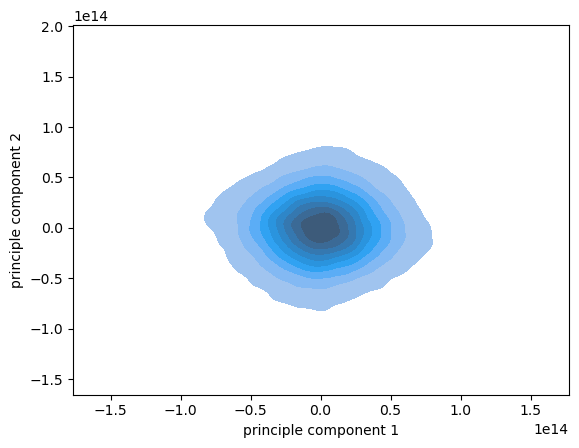

In [7]:
# Standardizing the data since PCA's output is influenced based on the scale of the features of the data

x = df_vel.loc[:, ].values
x_norm = StandardScaler().fit_transform(x) # normalizing the features

# Creating Dataframe of normalized values
df_vel_norm = pd.DataFrame(x_norm,columns=list(df_vel.columns.values))

# Projecting the six-dimensional Translational Velocity to two-dimensional principal components
pca_vel = PCA(n_components=2)
pca_vel = pca_vel.fit_transform(x)

# Create Dataframe of principal components
pca_vel_df = pd.DataFrame(data = pca_vel, columns = ['principle component 1', 'principle component 2'])

print('Explained variation per principal component:')
print(pca_vel_df.var())

# Plotting of Principal components
sns.kdeplot(data = pca_vel_df, x = "principle component 1", y = "principle component 2", fill= True)
plt.show()


##### Rotational Velocities

Explained variation per principal component:
principle component 1    903.060449
principle component 2    901.546818
dtype: float64


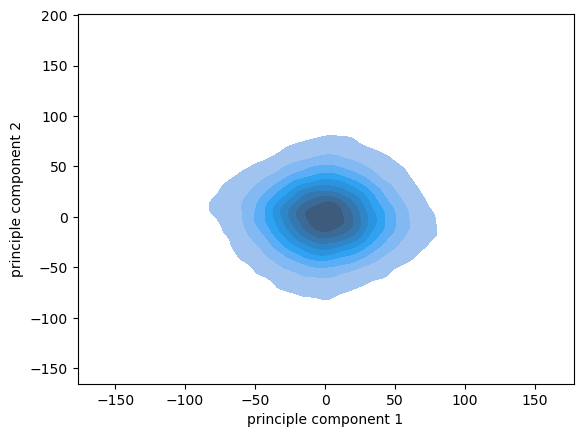

In [6]:
filename = 'D:/OneDrive - TU Eindhoven/Quartile_4/4AI000_Machine learning for Multi-physics modelling and design/Materials_for_ML_assignment_2024/H2_IsoThermalWalls_Sw_0/H2_omega_Sw_0_B300_Th_300.txt'
names_rot_vel = ['Omega_1_in', 'Omega_2_in', 'Omega_1_out', 'Omega_2_out']
df_rot_vel = pd.read_csv(filename, sep= '\s+', header=None, skiprows=[0], names = names_rot_vel)

# Standardizing the data since PCA's output is influenced based on the scale of the features of the data

x = df_rot_vel.loc[:, ].values
x_norm = StandardScaler().fit_transform(x) # normalizing the features

# Creating Dataframe of normalized values
df_rot_vel_norm = pd.DataFrame(x_norm, columns = names_rot_vel)

# Projecting the four-dimensional Rotational Velocity to two-dimensional principal components
pca_rot_vel = PCA(n_components=2)
pca_rot_vel = pca_rot_vel.fit_transform(x)

# Create Dataframe of principal components
pca_rot_vel_df = pd.DataFrame(data = pca_rot_vel, columns = ['principle component 1', 'principle component 2'])

print('Explained variation per principal component:')
print(pca_rot_vel_df.var())

# Plotting of Principal components
sns.kdeplot(data = pca_rot_vel_df, x = "principle component 1", y = "principle component 2", fill= True)

plt.show()

### For non-isothermal wall

##### PCA of Translations Velocity

In [9]:
# Create data frame and store translational velocity components
filename_trans = r'D:\OneDrive - TU Eindhoven\Quartile_4\4AI000_Machine learning for Multi-physics modelling and design\Materials_for_ML_assignment_2024\H2_NonIsoThermalWalls_Sw_0\H2_Vel_MD_Sw_0_B300_Th_500.txt'
names_vel = ['v_x_in', 'v_y_in', 'v_z_in', 'v_x_out', 'v_y_out', 'v_z_out',]
df_trans_vel = pd.read_csv(filename_trans, sep= '\s+', header=None, skiprows=[0], names = names_vel).sample(frac = 1)

# Convert to m/s
df_trans_vel = df_trans_vel*conv_v

# Create data frame and store rotational velocity components
filename_rot = r'D:\OneDrive - TU Eindhoven\Quartile_4\4AI000_Machine learning for Multi-physics modelling and design\Materials_for_ML_assignment_2024\H2_NonIsoThermalWalls_Sw_0\H2_omega_Sw_0_B300_Th_500.txt'
names_rot_vel = ['omega_1_in', 'omega_2_in', 'omega_1_out', 'omega_2_out']
df_rot_vel = pd.read_csv(filename_rot, sep= '\s+', header=None, skiprows=[0], names = names_rot_vel).sample(frac = 1)

# Convert to 1/s
df_rot_vel = df_rot_vel*conv_omega

# Concatenate all velocity components
df_vel = pd.concat([df_trans_vel, df_rot_vel], axis=1)

# Uncomment below line for Argon
# df_vel = df_rot_vel   

#Remove NaN values from dataframe
df_vel.replace([np.inf, -np.inf], np.nan, inplace=True)
df_vel.dropna(axis= 0, how='any')

,v_x_in,v_y_in,v_z_in,v_x_out,v_y_out,v_z_out,omega_1_in,omega_2_in,omega_1_out,omega_2_out
148140,-1162.7725,-1858.0750,210.8125,-716.09900,820.99785,-1901.70500,2.579454e+13,-5.191814e+13,8.627303e+12,2.870504e+13
130460,-981.3695,-1119.0335,1381.0360,181.42500,696.60600,618.79600,1.369677e+13,-6.944269e+13,6.027837e+13,3.166916e+13
108621,536.0725,-1376.8365,1642.6815,1669.95550,488.83050,1128.99100,-4.295494e+13,-2.179137e+13,5.455179e+13,-1.173519e+13
79411,1308.9300,-1820.6900,-779.6765,-1930.00000,1773.58600,1297.57450,-2.478598e+13,9.472447e+12,-3.301977e+13,2.152573e+13
111392,2042.9020,-768.8105,1050.3120,1210.47600,2093.38500,-880.10945,-7.116860e+13,-3.773449e+13,2.657169e+13,-1.495687e+11
...,...,...,...,...,...,...,...,...,...,...
39881,-814.6235,-1106.2700,1309.2895,-95.65500,1425.25800,-319.94500,-7.315720e+13,-3.640135e+12,-3.783162e+13,-7.125663e+13
207616,-1536.2705,-588.7493,1949.6250,-1502.35295,578.00550,-599.33150,1.192362e+13,2.583275e+13,4.096638e+13,1.797810e+13
187497,-376.6165,-683.2590,-717.7030,-7.55600,1460.58500,806.60100,4.205169e+13,-8.776222e+12,1.015328e+13,-2.291129e+13
311726,2422.8900,-2264.8180,1147.5040,1484.81500,2034.69000,-241.94450,7.235973e+12,4.501211e+13,-1.682544e+13,-8.899238e+12


Explained variation per principal component:
principle component 1    1.201579e+27
principle component 2    1.192177e+27
dtype: float64


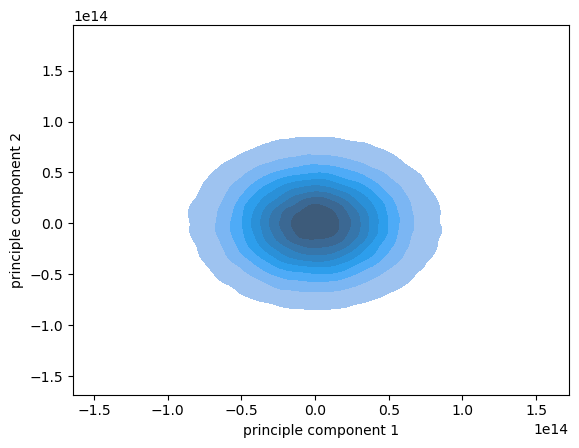

In [10]:
# Standardizing the data since PCA's output is influenced based on the scale of the features of the data

x = df_vel.loc[:, ].values
x_norm = StandardScaler().fit_transform(x) # normalizing the features

# Creating Dataframe of normalized values
df_vel_norm = pd.DataFrame(x_norm,columns=list(df_vel.columns.values))

# Projecting the six-dimensional Translational Velocity to two-dimensional principal components
pca_vel = PCA(n_components=2)
pca_vel = pca_vel.fit_transform(x)

# Create Dataframe of principal components
pca_vel_df = pd.DataFrame(data = pca_vel, columns = ['principle component 1', 'principle component 2'])

print('Explained variation per principal component:')
print(pca_vel_df.var())

# Plotting of Principal components
sns.kdeplot(data = pca_vel_df, x = "principle component 1", y = "principle component 2", fill= True)
plt.show()


##### Rotational Velocities

Explained variation per principal component:
principle component 1    1389.296960
principle component 2    1388.014658
dtype: float64


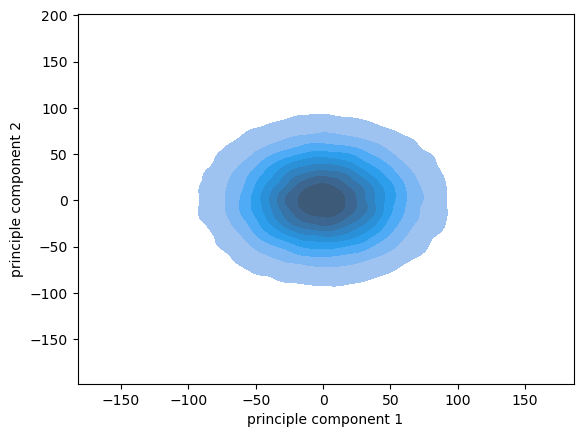

In [8]:
filename = 'D:/OneDrive - TU Eindhoven/Quartile_4/4AI000_Machine learning for Multi-physics modelling and design/Materials_for_ML_assignment_2024/H2_NonIsoThermalWalls_Sw_20/H2_omega_Sw_20_T500_Tb_300.txt'
names_rot_vel = ['Omega_1_in', 'Omega_2_in', 'Omega_1_out', 'Omega_2_out']
df_rot_vel = pd.read_csv(filename, sep= '\s+', header=None, skiprows=[0], names = names_rot_vel)

# Standardizing the data since PCA's output is influenced based on the scale of the features of the data

x = df_rot_vel.loc[:, ].values
x_norm = StandardScaler().fit_transform(x) # normalizing the features

# Creating Dataframe of normalized values
df_rot_vel_norm = pd.DataFrame(x_norm,columns=names_rot_vel)

# Projecting the four-dimensional Rotational Velocity to two-dimensional principal components
pca_rot_vel = PCA(n_components=2)
pca_rot_vel = pca_rot_vel.fit_transform(x)

# Create Dataframe of principal components
pca_rot_vel_df = pd.DataFrame(data = pca_rot_vel, columns = ['principle component 1', 'principle component 2'])

print('Explained variation per principal component:')
print(pca_rot_vel_df.var())

# Plotting of Principal components
sns.kdeplot(data = pca_rot_vel_df, x = "principle component 1", y = "principle component 2", fill= True)

plt.show()